## Origin Heatmap
The purpose of this project is to map the 7mer seq with relation to chronology, specifically their family origin. To do this, I collect the Seed and Node of origin (family) data from [mirgenedb.org](https://mirgenedb.org/browse/dre?sort=node&seed=&dir=0), then create a dictionary of elements that are then mapped onto the 2D 7mer map with discrete colors. 

Note that I have NOT used reverse_compliment. I've replaced all uracil with thymine. I've replaced the phylogeny with numbers (1 being the most recent / being the oldest):
D. rerio = 1
Clupeocephala = 2
Neopterygii = 3
Osteichthyes = 4
Gnathostomata = 5
Vertebrata = 6
Olfactores = 7
Chordata = 8
Deuterostomia = 9
Bilateria = 10
Eumetazoa = 11

In [3]:
import csv
def get_dict(filename):
    dict_from_csv = {}

    with open(filename+'.csv', mode='r') as inp:
        reader = csv.reader(inp)
        dict_from_csv = {rows[0]:rows[1] for rows in reader}
    return dict_from_csv

def print_map(filename, map_):
    df=pd.DataFrame(map_)
    df.to_csv(filename+'.csv', index= False, header = False)
    


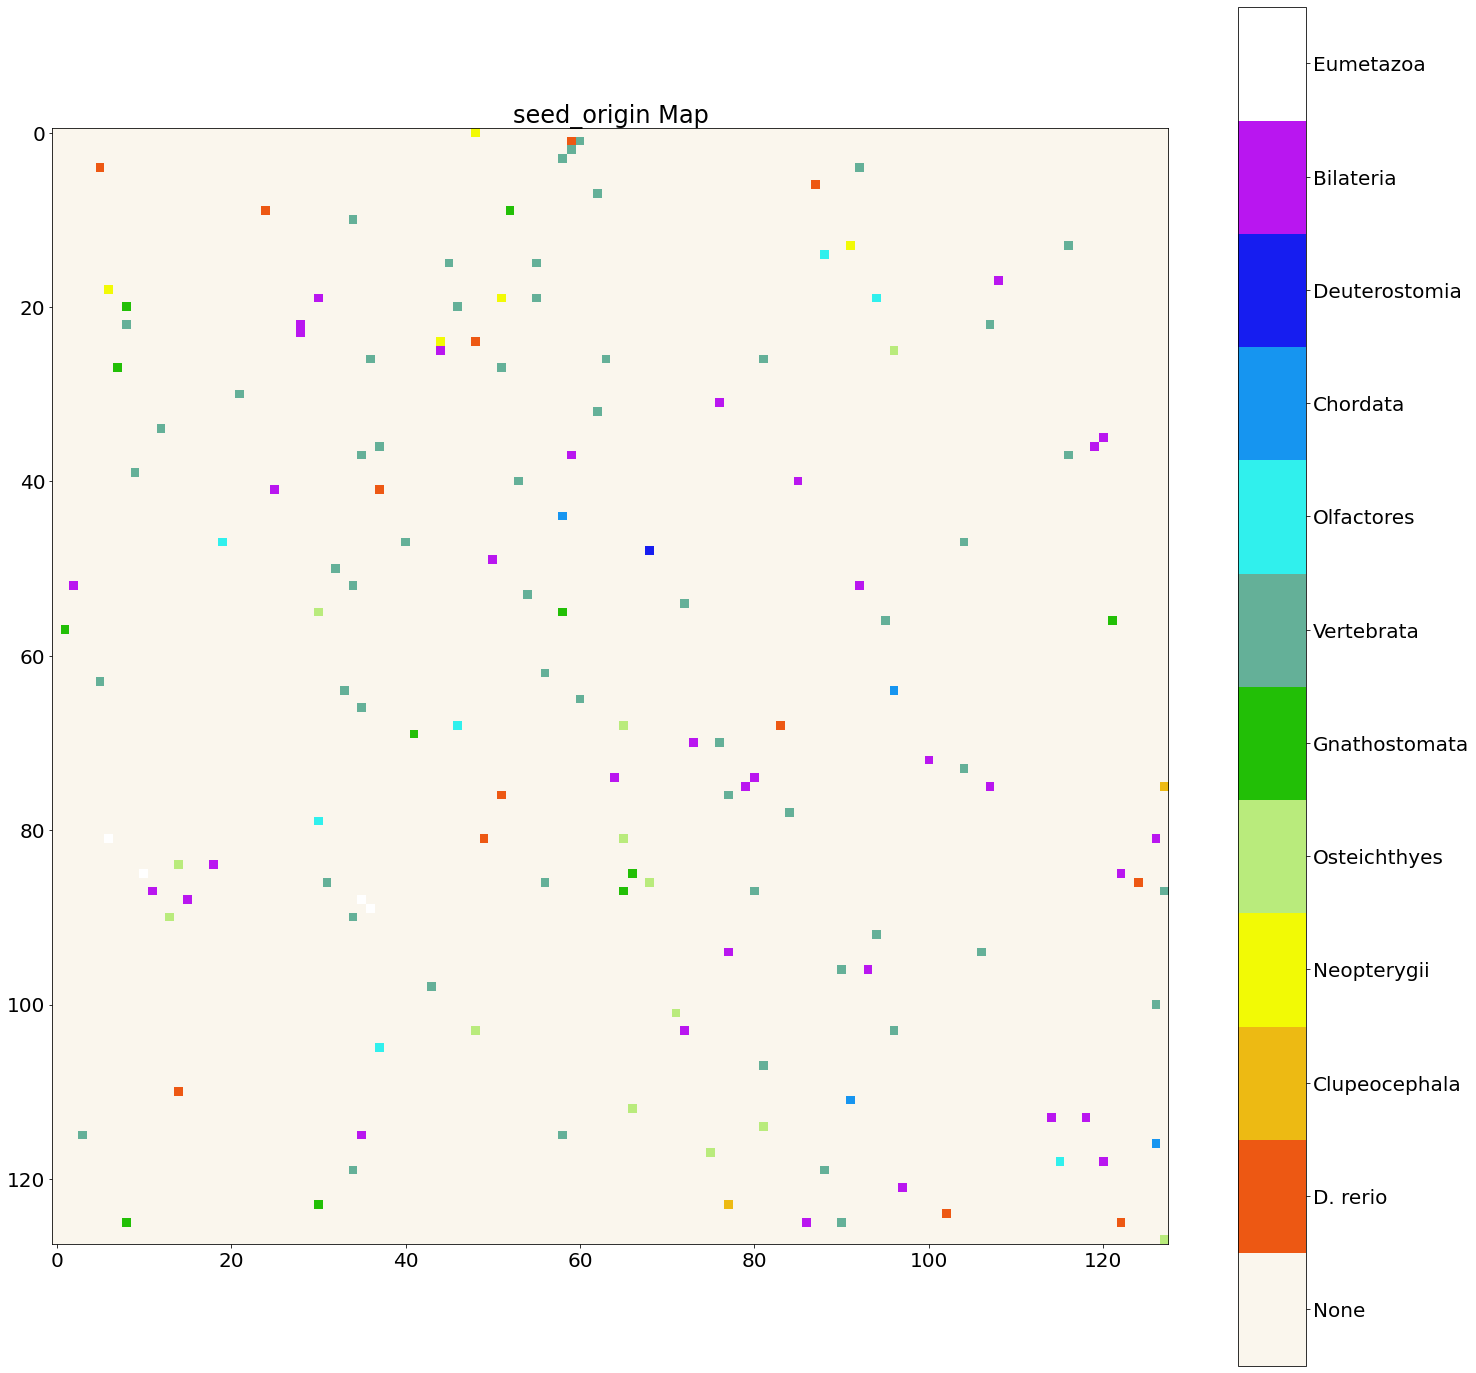

In [7]:
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.colors as colors

import numpy as np

SIZE = 7

def make_map(filename):
    origin_dict = get_dict(filename)

    #create the dictionary from 7-seq
    df = pd.read_csv("AGTC-7seq.csv", header = None)
    data_arr = np.array(df).flatten()

    data_dict = {data_arr[i]: 0 for i in range(0, len(data_arr))}

    #Update the dictionary:
    for i in origin_dict:
        data_dict[i] = origin_dict[i]
        
     #Convert dictionary back into 1D array
    data_arr1 = np.array(list(data_dict.values()))

    #Convert 1D array back into a 2D array
    data_arr2 = np.reshape(data_arr1, (2**SIZE,2**SIZE))

    #save the map as a csv
    print_map(filename+"_map", data_arr2)

    #map 2D array
    df = pd.read_csv(filename+"_map.csv", header = None)
    
    
    fig = plt.figure(figsize=(25,25))
    
    cmap = colors.ListedColormap(['#faf6ed', '#ed5813','#edba13', '#f2fa05', '#b9eb7c', '#22bf06', '#64b098', '#30f0ed', '#1695f0', '#161df0', '#b916f0', 'white'])
    bounds=[-.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5]
    norm = colors.BoundaryNorm(bounds, cmap.N)
    heatmap = plt.imshow(df, cmap=cmap, norm = norm)
    cbar = plt.colorbar(heatmap)
    cbar.set_ticks([0,1,2,3,4,5,6,7,8,9,10,11])
    cbar.set_ticklabels(['None','D. rerio','Clupeocephala','Neopterygii','Osteichthyes','Gnathostomata','Vertebrata','Olfactores','Chordata','Deuterostomia','Bilateria','Eumetazoa'])
    
    
   
    plt.rc('font', size=20)
    plt.title(filename+" Map")
    plt.savefig(filename+" Map")
    plt.show()
    

    
make_map("seed_origin")
